In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df = pd.read_csv("/content/titanic[1].csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:

df.duplicated().sum()

0

In [ ]:
Survived = df['Survived'].value_counts()

<Axes: xlabel='Survived', ylabel='count'>

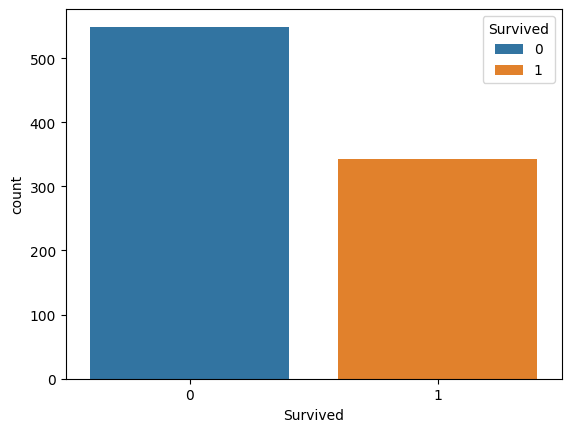

In [ ]:
sns.countplot(x=df['Survived'], hue=df['Survived'])

In [ ]:

Sex = df['Sex'].value_counts()

In [ ]:

Sex

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
df["Sex"]



0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

<Axes: xlabel='Sex', ylabel='count'>

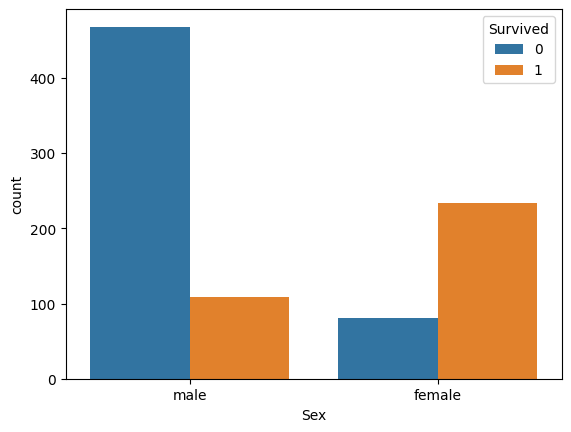

In [ ]:
sns.countplot(x=df['Sex'], hue=df['Survived'])


In [ ]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)

In [ ]:
print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')


In [ ]:

df.head()


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
inputs = df.drop('Survived', axis='columns')
target = df['Survived']


In [ ]:
sex = pd.get_dummies(inputs.Sex)
sex.head()


,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [ ]:

inputs=pd.concat([inputs,sex], axis="columns")
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False
3,1,female,35.0,53.1000,True,False
4,3,male,35.0,8.0500,False,True


In [ ]:
inputs.drop(["Sex"], axis="columns", inplace=True)

In [ ]:

inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [ ]:
inputs.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

In [ ]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [ ]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Fare    891 non-null    float64
 3   female  891 non-null    bool   
 4   male    891 non-null    bool   
dtypes: bool(2), float64(2), int64(1)
memory usage: 22.7 KB


In [ ]:

inputs.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

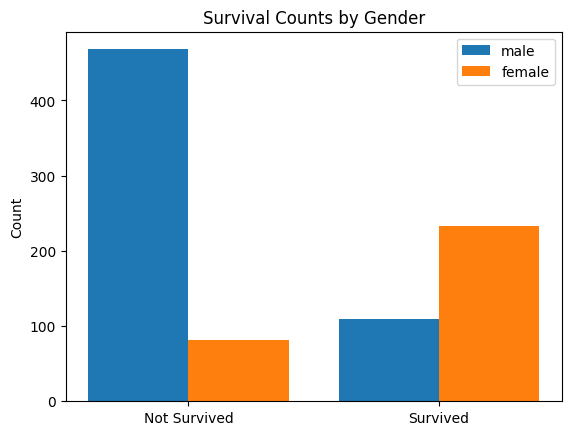

In [ ]:
counts = df.groupby(['Survived', 'Sex']).size().unstack().fillna(0)

bar_width = 0.40
index = counts.index

fig, ax = plt.subplots()

bar1 = ax.bar(index - bar_width/2, counts['male'], bar_width, label='male')
bar2 = ax.bar(index + bar_width/2, counts['female'], bar_width, label='female')

ax.set_label('Survived')
ax.set_ylabel('Count')
ax.set_title('Survival Counts by Gender')
ax.set_xticks(index)
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.legend()

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [ ]:

X_train

,Pclass,Age,Fare,female,male
425,3,29.699118,7.2500,False,True
768,3,29.699118,24.1500,False,True
427,2,19.000000,26.0000,True,False
73,3,26.000000,14.4542,False,True
806,1,39.000000,0.0000,False,True
...,...,...,...,...,...
377,1,27.000000,211.5000,False,True
340,2,2.000000,26.0000,False,True
385,2,18.000000,73.5000,False,True
162,3,26.000000,7.7750,False,True


In [ ]:
X_test

,Pclass,Age,Fare,female,male
670,2,40.000000,39.0000,True,False
721,3,17.000000,7.0542,False,True
184,3,4.000000,22.0250,True,False
559,3,36.000000,17.4000,True,False
8,3,27.000000,11.1333,True,False
...,...,...,...,...,...
531,3,29.699118,7.2292,False,True
598,3,29.699118,7.2250,False,True
693,3,25.000000,7.2250,False,True
577,1,39.000000,55.9000,True,False


In [ ]:
y_train

425    0
768    0
427    1
73     0
806    0
      ..
377    0
340    1
385    0
162    0
701    1
Name: Survived, Length: 712, dtype: int64

In [ ]:

y_test

670    1
721    0
184    1
559    1
8      1
      ..
531    0
598    0
693    0
577    1
345    1
Name: Survived, Length: 179, dtype: int64

In [ ]:

inputs.corr()

,Pclass,Age,Fare,female,male
Pclass,1.000000,-0.331339,-0.549500,-0.131900,0.131900
Age,-0.331339,1.000000,0.091566,-0.084153,0.084153
Fare,-0.549500,0.091566,1.000000,0.182333,-0.182333
female,-0.131900,-0.084153,0.182333,1.000000,-1.000000
male,0.131900,0.084153,-0.182333,-1.000000,1.000000


<Axes: >

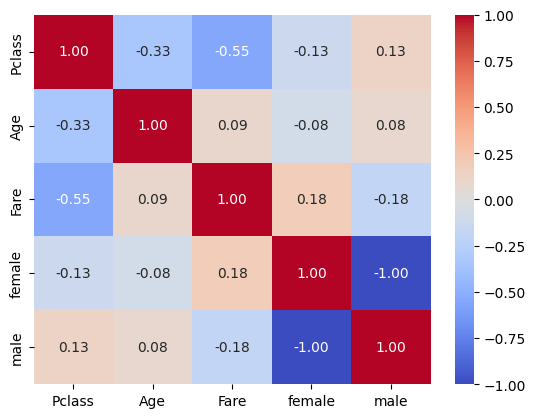

In [ ]:
sns.heatmap(inputs.corr(), annot = True, cmap='coolwarm', fmt=".2f")

In [ ]:
model=RandomForestClassifier()

In [ ]:

model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
model.score(X_test,y_test)

0.8268156424581006

In [ ]:

pre=model.predict(X_test)

In [ ]:
matrices=r2_score(pre,y_test)
matrices

0.27273918741808645